# FizHugh-Nagumo Simulator

_The FitzHugh-Nagumo Model:_

$$ \frac{dV}{dt} = g_1(V, W) = f(V) - W + I $$

$$ \frac{dW}{dt} = g_2(V, W) = \epsilon (V - aW + b) $$

$$ f(V) = V - \frac{1}{3}V^3, \quad \epsilon = \frac{1}{\tau} $$

In [1]:
# Imports

import numpy as np
import numbers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style='white')

In [2]:
# Derivatives

def g1(V, W, I):
    return V - (1/3)*V**3 - W + I


def g2(V, W, tau, a, b):
    return (1/tau)*(V - a*W + b)

In [3]:
def runge_kutta_4(V0, W0, h, N, tau, a_arr, b_arr, I_arr):
    '''
    Runge-Kutta solver
    
    Parameters
    ----------
    (V0, W0) = initial point in phase space
    h = step size
    N = number of steps to simulate for
    tau = time scale constant
    a, b, I = parameters of FHN
    '''
    
    V_arr = np.zeros(N, dtype=np.float128)
    W_arr = np.zeros(N, dtype=np.float128)

    V_arr[0] = V0
    W_arr[0] = W0
    
    for i in range(N-1):
        k0 = h*g1(V_arr[i], W_arr[i], I_arr[i])
        l0 = h*g2(V_arr[i], W_arr[i], tau, a_arr[i], b_arr[i])
        k1 = h*g1(V_arr[i] + 0.5*k0, W_arr[i] + 0.5*l0, I_arr[i])
        l1 = h*g2(V_arr[i] + 0.5*k0, W_arr[i] + 0.5*l0, tau, a_arr[i], b_arr[i])
        k2 = h*g1(V_arr[i] + 0.5*k1, W_arr[i] + 0.5*l1, I_arr[i])
        l2 = h*g2(V_arr[i] + 0.5*k1, W_arr[i] + 0.5*l1, tau, a_arr[i], b_arr[i])
        k3 = h*g1(V_arr[i] + k2, W_arr[i] + l2, I_arr[i])
        l3 = h*g2(V_arr[i] + k2, W_arr[i] + l2, tau, a_arr[i], b_arr[i])
        
        V_arr[i+1] = V_arr[i] + (1/6)*(k0 + 2*k1 + 2*k2 + k3)
        W_arr[i+1] = W_arr[i] + (1/6)*(l0 + 2*l1 + 2*l2 + l3)
        
    return V_arr, W_arr

In [4]:
def fhn(V0, W0, h, N, tau=None, a=None, b=None, I=None):
    '''
    Plots a phase portrait of the FitzHugh-Nagumo neuron
    
    Parameters
    ----------
    (V0, W0) = initial point in phase space
    h = step size
    N = number of steps to simulate for
    tau = time scale constant; defaults to 12.5 ("sufficiently large")
    a, b, I = parameters of FHN; default to 1, 1, 0
    '''
    
    if tau is None:
        tau = 12.5
    if a is None:
        a = 1
    if isinstance(a, numbers.Number):
        a_arr = np.repeat(a, N)
    else:
        a_arr = a
    if b is None:
        b = 1
    if isinstance(b, numbers.Number):
        b_arr = np.repeat(b, N)
    else:
        b_arr = b
    if I is None:
        I = 0
    if isinstance(I, numbers.Number):
        I_arr = np.repeat(I, N)
    else:
        I_arr = I

    fig, ax = plt.subplots(figsize=[14, 10])
    
    V_arr, W_arr = runge_kutta_4(V0, W0, h, N, tau, a_arr, b_arr, I_arr)

    # Plot phase trajectory
    ax.scatter(V_arr, W_arr,
               c=np.linspace(10, 0, N),
               cmap=cm.jet,
               marker='.')

    x_bottom, x_top = ax.get_xlim()
    y_bottom, y_top = ax.get_ylim()

    # Plot nullclines, if a, b, I are constants
    x = np.linspace(x_bottom, x_top)

    try:
        V_nullcline = x - (1/3)*x**3 + I
        ax.plot(x, V_nullcline, color='m', linestyle='--')
    except:
        pass

    try:
        W_nullcline = (1/a) * (x + b)
        ax.plot(x, W_nullcline, color='k', linestyle='--')
    except ZeroDivisionError:
        ax.axvline(-b, y_bottom, y_top, color='k', linestyle='--')

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    sns.despine()
    plt.show()

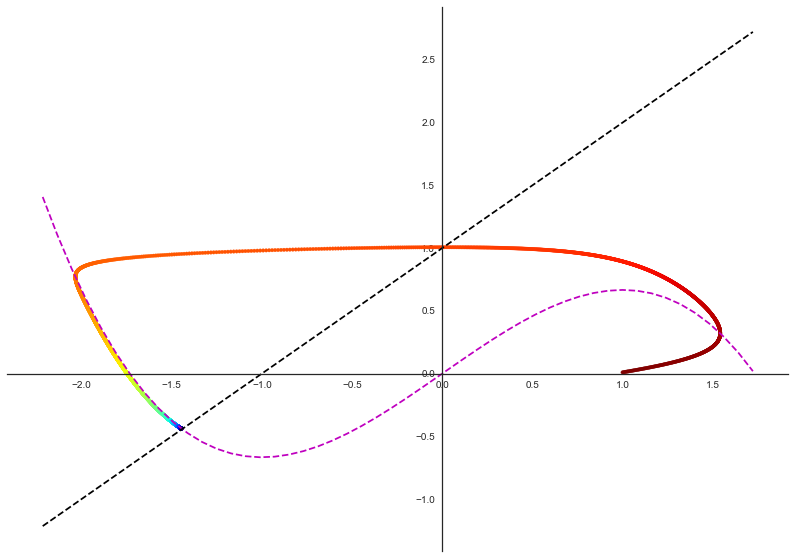

In [5]:
fhn(1, 0.01, 0.01, 5000)